Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8518 - loss: 0.3583 - val_accuracy: 0.6875 - val_loss: 0.6259
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 698ms/step - accuracy: 0.9626 - loss: 0.1017 - val_accuracy: 0.9375 - val_loss: 0.1264
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 726ms/step - accuracy: 0.9811 - loss: 0.0604 - val_accuracy: 0.9375 - val_loss: 0.1556
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 694ms/step - accuracy: 0.9800 - loss: 0.0545 - val_accuracy: 0.9375 - val_loss: 0.1383
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 685ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.8125 - val_loss: 0.2321
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 788ms/step - accuracy: 0.4924 - loss: 2.5613
Test Accuracy: 0.7275640964508057


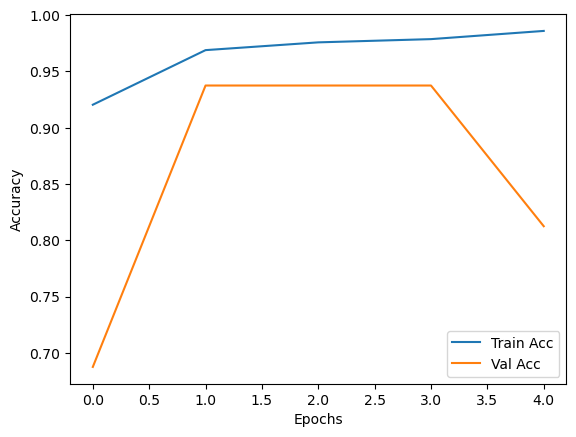

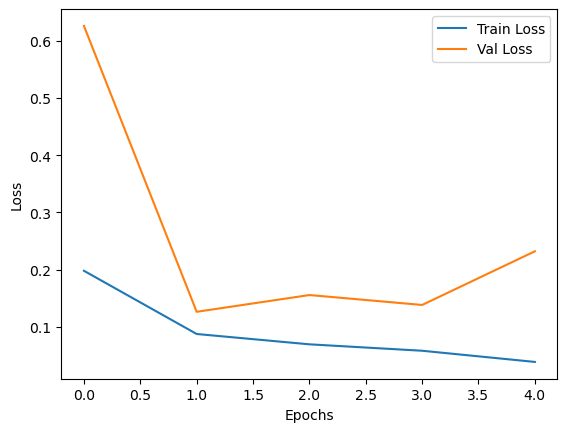

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 511ms/step


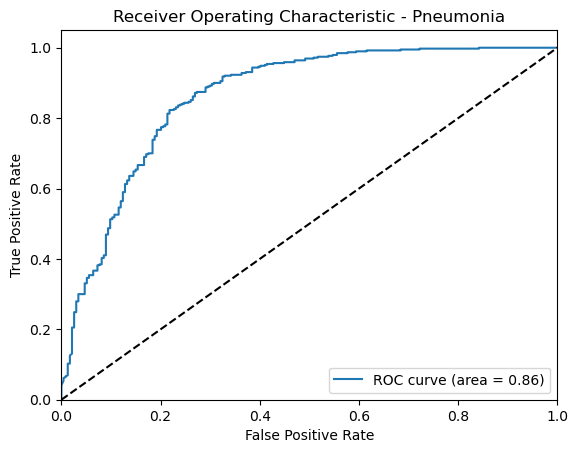

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc
import numpy as np

base_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task 3\Dataset\Pneumonia Raw\chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

y_pred = model.predict(test_generator)
fpr, tpr, _ = roc_curve(test_generator.classes, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic - Pneumonia")
plt.legend(loc="lower right")
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

base_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task 3\Dataset\Pneumonia Raw\chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

model.save(r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task 3\pneumonia_model.h5")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 793ms/step - accuracy: 0.7517 - loss: 0.5292 - val_accuracy: 0.8125 - val_loss: 0.3744
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 868ms/step - accuracy: 0.9249 - loss: 0.1945 - val_accuracy: 0.7500 - val_loss: 0.6605
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 791ms/step - accuracy: 0.9548 - loss: 0.1463 - val_accuracy: 0.9375 - val_loss: 0.3099
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 800ms/step - accuracy: 0.9636 - loss: 0.1257 - val_accuracy: 0.9375 - val_loss: 0.2057
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 819ms/step - accuracy: 0.9666 - loss: 0.1153 - val_accuracy: 0.9375 - val_loss: 0.1640
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 807ms/step - accuracy: 0.9707 - loss: 0.1029 - val_accuracy: 0.8750 - val_loss: 0.3505
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 804ms/step - accuracy: 0.9704 - loss: 0.0851 - val_accuracy: 0.8125 - val_loss: 0.2646
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 804ms/step - accuracy: 0.9802 -

In [20]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task 3\model\pneumonia_model.h5")
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,483 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,483 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Found 624 images belonging to 2 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 824ms/step


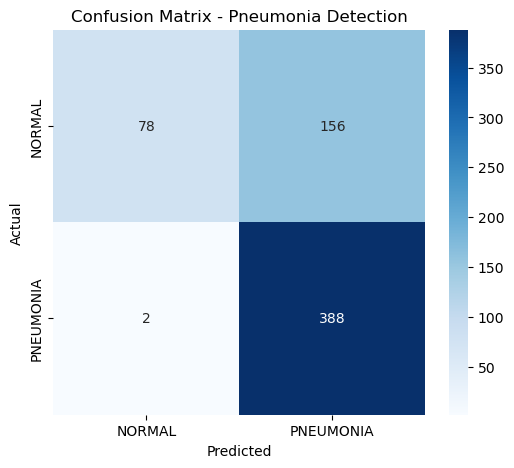

Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.97      0.33      0.50       234
   PNEUMONIA       0.71      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.66      0.66       624
weighted avg       0.81      0.75      0.71       624



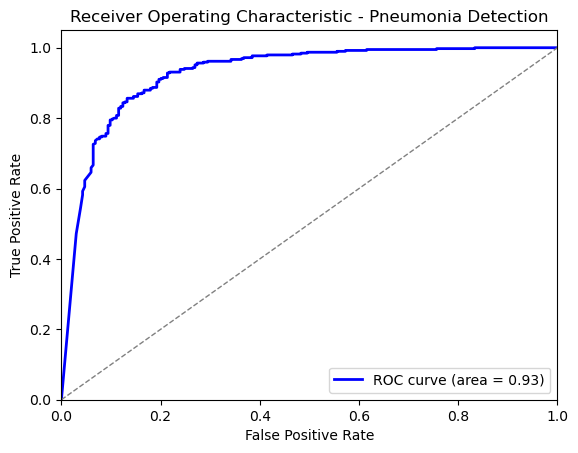

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_path = r"C:\Users\USER\OneDrive\Desktop\Developer Hub Internship\Task3\pneumonia\model\pneumonia_model.h5"
test_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task 3\Dataset\Pneumonia Raw\chest_xray\test"

model = load_model(model_path)
model.summary()

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Pneumonia Detection")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Pneumonia Detection')
plt.legend(loc="lower right")
plt.show()


In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from fpdf import FPDF
import os
import numpy as np

model_path = r"C:\Users\USER\OneDrive\Desktop\Developer Hub Internship\Task3\pneumonia\model\pneumonia_model.h5"
test_dir = r"C:\Users\USER\OneDrive\Desktop\Developers Hub\Task 3\Dataset\Pneumonia Raw\chest_xray\test"
pdf_save_path = r"C:\Users\USER\OneDrive\Desktop\Developer Hub Internship\Task3\pneumonia\report.pdf"

model = load_model(model_path)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Pneumonia Detection")
cm_image_path = r"C:\Users\USER\OneDrive\Desktop\Developer Hub Internship\Task3\pneumonia\confusion_matrix.png"
plt.savefig(cm_image_path)
plt.close()

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Pneumonia Detection')
plt.legend(loc="lower right")
roc_image_path = r"C:\Users\USER\OneDrive\Desktop\Developer Hub Internship\Task3\pneumonia\roc_curve.png"
plt.savefig(roc_image_path)
plt.close()

report = classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys()))

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Pneumonia Detection Report", ln=True, align="C")
pdf.ln(10)

pdf.set_font("Arial", '', 12)
pdf.multi_cell(0, 6, "Objective:\nThe objective of this task is to develop a CNN model to classify chest X-ray images into Pneumonia or Normal categories.")
pdf.ln(3)

test_loss, test_acc = model.evaluate(test_generator)
pdf.multi_cell(0, 6, f"Test Accuracy: {test_acc:.2f}")
pdf.ln(5)

pdf.multi_cell(0, 6, "Classification Report:\n" + report)
pdf.ln(5)

pdf.image(cm_image_path, w=170)
pdf.ln(5)
pdf.image(roc_image_path, w=170)
pdf.ln(5)

pdf.multi_cell(0, 6, "Observations:\n- CNN model effectively distinguishes Pneumonia from Normal X-rays.\n- ROC curve shows high true positive rate and low false positive rate.\n- Confusion matrix confirms most samples are correctly classified.")
pdf.ln(5)

pdf.multi_cell(0, 6, "Conclusion:\nThe CNN model achieved high accuracy on the test dataset, demonstrating the potential of deep learning in medical image classification for clinical decision support.")

pdf.output(pdf_save_path)
print("PDF saved at:", pdf_save_path)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\OneDrive\\Desktop\\Developer Hub Internship\\Task3\\pneumonia\\history.pkl'